### 예제 : 경사 하강법
#### 공부한 시간과 성적 사이 관계 분석하기 (3)

##### 1. 단일 선형 회귀

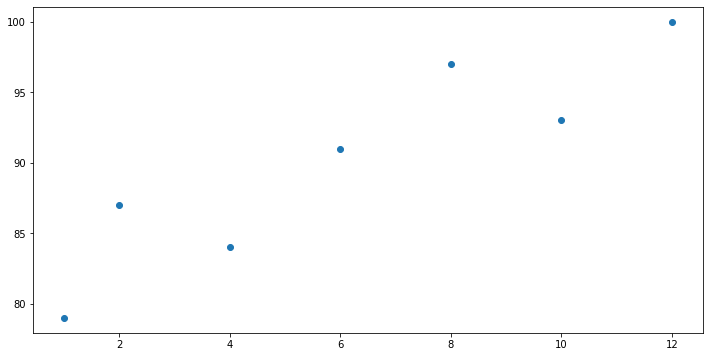

In [1]:
import numpy as np
import matplotlib.pyplot as plt

time = [1, 2, 4, 6, 8, 10, 12]
score = [79, 87, 84, 91, 97, 93, 100]

time_data = np.array(time)
score_data = np.array(score)

plt.figure(figsize=(12, 6))
plt.scatter(time, score)
plt.show()

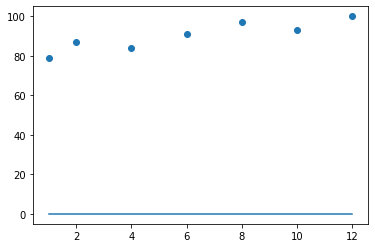

In [2]:
# 초기 설정
a = 0
b = 0

predict = [a * t + b for t in time]

plt.scatter(time, score)
plt.plot([min(time), max(time)], [min(predict), max(predict)])
plt.show()

$$MSE=\frac {1}{n}\sum \left( \widehat {y}_{i}-y_{i}\right) ^{2}$$
<br>
$$\frac {\partial }{\partial a}nSE=\frac {2}{n}\sum \left( \widehat {y}_{i}-y_{i}\right) x_{i}$$
<br>
$$\frac {\partial }{\partial b}nSE=\frac {2}{n}\sum \left( \widehat {y}_{i}-y_{i}\right)$$

epoch : 0, a : 0.5772857142857142, b : 0.09014285714285714
epoch : 1000, a : 8.73863068409531, b : 20.115156983517174
epoch : 2000, a : 7.04381846233646, b : 34.426165893214936
epoch : 3000, a : 5.753336231266661, b : 45.32300890009426
epoch : 4000, a : 4.770723309713259, b : 53.62020082177
epoch : 5000, a : 4.022531563746078, b : 59.93793832993282
epoch : 6000, a : 3.452835321762571, b : 64.74845827437028
epoch : 7000, a : 3.0190510547220626, b : 68.41133633885637
epoch : 8000, a : 2.688754351909479, b : 71.20036452505221
epoch : 9000, a : 2.4372562682349117, b : 73.32401649665735
epoch : 10000, a : 2.2457578804115554, b : 74.94103052284174


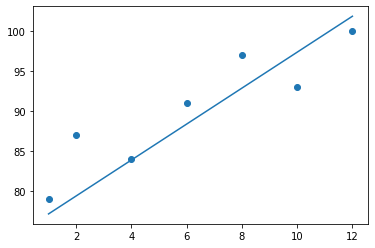

In [3]:
learning_rate = 0.001

for i in range(10001):
    score_predict = a * time_data + b
    error = score_data - score_predict
    
    a_diff = -(1 / len(time_data)) * sum(time_data * error)
    b_diff = -(1 / len(time_data)) * sum(error)
    
    # 미분값을 뺴는 이유는 미분값과 실제 정답과 부호가 반대로 되어있음으로
    a = a - learning_rate * a_diff
    b = b - learning_rate * b_diff
    
    if i % 1000 == 0:
        print("epoch : {}, a : {}, b : {}".format(i, a, b))
        
predict = [a * t + b for t in time]

plt.scatter(time, score)
plt.plot([min(time), max(time)], [min(predict), max(predict)])
plt.show()

### 왜 되지 않을까???
기존 예제에 맞는 학습률을 사용했기 때문에 수렴되지 않고 발산해버렸다. 적당한 학습률이 필요하다는 것을 확인한 예제!

##### 2. 다중 선형 회귀

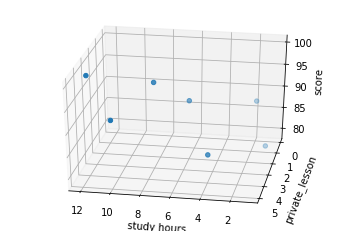

In [4]:
from mpl_toolkits import mplot3d

# time과 score는 동일하게 사용
lesson = [1, 0, 4, 2, 3, 5, 4]
ax = plt.axes(projection='3d')
ax.set_xlabel('study hours')
ax.set_ylabel('private_lesson')
ax.set_zlabel('score')
ax.dist = 10
ax.view_init(30, 100)
ax.scatter(time, lesson, score)

In [5]:
lesson_data = np.array(lesson)

# 기울기, 절편 초기화
a1 = 0
a2 = 0
b = 0

for i in range(10001):
    score_predict = a1 * time_data + a2 * lesson_data + b
    error = score_data - score_predict
    a1_diff = - (1 / len(time_data)) * sum(time_data * error)
    a2_diff = - (1 / len(lesson_data)) * sum(lesson_data * error)
    b_diff = - (1 / len(time_data)) * sum(error)
    a1 = a1 - learning_rate * a1_diff
    a2 = a2 - learning_rate * a2_diff
    b = b - learning_rate * b_diff
    
    if i % 1000 == 0:
        print("epoch = {}, a1 : {}, a2 : {}, b : {}".format(i, a1, a2, b))

epoch = 0, a1 : 0.5772857142857142, a2 : 0.25042857142857144, b : 0.09014285714285714
epoch = 1000, a1 : 6.380404154049643, a2 : 5.992892873194508, b : 19.08947195807482
epoch = 2000, a1 : 4.987425077507208, a2 : 5.409696537042156, b : 32.80507340289002
epoch = 3000, a1 : 4.230174268508863, a2 : 4.197570973491382, b : 43.4240397098885
epoch = 4000, a1 : 3.7536016418494986, a2 : 2.985478741288237, b : 51.694503065712105
epoch = 5000, a1 : 3.4210911311184837, a2 : 1.945023398879804, b : 58.153125761515355
epoch = 6000, a1 : 3.1749692803499716, a2 : 1.098722691850813, b : 63.20288252110883
epoch = 7000, a1 : 2.9872679521294625, a2 : 0.4252288570533059, b : 67.15321256233833
epoch = 8000, a1 : 2.8420840941622467, a2 : -0.10575151822914222, b : 70.24421910483524
epoch = 9000, a1 : 2.729058346532788, a2 : -0.5226631724255973, b : 72.66308976775942
epoch = 10000, a1 : 2.6408107563663306, a2 : -0.8494187752111442, b : 74.55606942094113


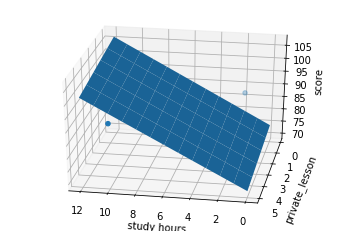

In [6]:
point  = np.array([1, 2, 3])
normal = np.array([a1, a2, -1])

# a1*time + a2*lesson + (-score) + b = 0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set

# create x,y
xx, yy = np.meshgrid(range(13), range(6))

# calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - b) * 1. /normal[2]

# plot the surface
plt3d = plt.figure().gca(projection='3d')
plt3d.set_xlabel('study hours')
plt3d.set_ylabel('private_lesson')
plt3d.set_zlabel('score')
plt3d.dist = 10
plt3d.scatter(time, lesson, score)
plt3d.plot_surface(xx, yy, z)
plt3d.view_init(30, 100)
plt.show()